# Linear Regression and the Machine Learning Workflow

## CSC/DSC 340 Week 2 Slides

[Dr. Julie Butler](juliebutler.org)


August 28 - September 1, 2023


## Plans for the Week

### Monday
* Lecture: "Linear Regression and the Machine Learning Workflow"
* Week 1 In-Class Assignment and Week 2 Pre-Class Due
* Suggested Reading: Hands-On Chapter 2 and Chapter 4 (only about linear regression)

### Wednesday 
* Finish "Linear Regression and the Machine Learning Workflow"
* Start In-Class Assignment: Revisting Nuclear Binding Energies with Linear Regression
* Week 1 Post-Class Due
* Suggested Reading: Hands-On Chapter 2 and Chapter 4 (only about linear regression)

### Friday
* Finish In-Class Assignment: Revisting Nuclear Binding Energies with Linear Regression
* Suggested Reading: Hands-On Chapter 2 and Chapter 4 (only about linear regression)

## Part 1: Linear Regression

In [1]:
##############################
##          IMPORTS         ##
##############################
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

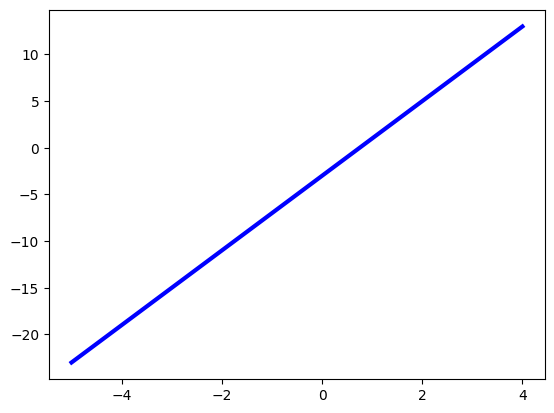

In [2]:
X = np.arange(-5,5)
y = 4*X-3

plt.plot(X,y, color='blue',linewidth=3)

## Goal: Find a line which fits the data set and can be used to predict new points from the data set

## Linear Regression

$$\hat{y} = X\theta$$

* $\hat{y}$: Machine learning predictions
* $X$: x-data, input data, features (vector or matrix)
* $\theta$: parameters or weights of the algorithm (vector)

**Goal**: Find $\theta$ such that $\hat{y} \approx y$

## Linear Regression Loss Function

Mean-Squared Error Function:

$$J_{MSE}(\theta) = \frac{1}{N}\sum_{i=1}^N (\hat{y}_i - y_i)^2$$

Re-write using linear regression:

$$J_{MSE}(\theta) = \frac{1}{N}\sum_{i=1}^N (X_i\theta - y_i)^2$$

Convert to matrix-vector notation:
$$ J_{MSE}(\theta) = \frac{1}{N}[X\theta - y]^T[X\theta - y]$$

## Find Optimized Weights

Loss Function: 

$$ J(\theta) = \frac{1}{N}[X\theta - y]^T[X\theta - y]$$

Optimize with respect to $\theta$ (minimization problem):

$$\frac{\partial J(\theta)}{\partial \theta} = 0 $$

Apply to the loss function:

$$ \frac{\partial}{\partial \theta} \{\frac{1}{N}[X\theta - y]^T[X\theta-y]\} = 0$$

Take the derivative:

$$X^T[X\theta - y] = 0$$

Solve for $\theta$:

$$ \theta = (X^TX)^{-1}X^Ty$$

Then to find prediction for new y-data points:

$$\hat{y} = X_{new}\theta = X_{new}(X^TX)^{-1}X^Ty$$

A closed-form solution!

## Implementing Linear Regression with Sklearn

In [21]:
# Create a linear regression instance using sklearn
linear_regression = LinearRegression()

# If the x-data in 1D, reshape as follows
X = X.reshape(-1,1)

# Fit the linear regression algoritm using the previously generated data
linear_regression.fit(X,y)

LinearRegression()

In [22]:
# Create new data from the same line in order to test its performance
X_test = np.arange(-10,10,0.1)
y_test = 4*X_test-3

X_test = X_test.reshape(-1,1)

y_pred = linear_regression.predict(X_test)

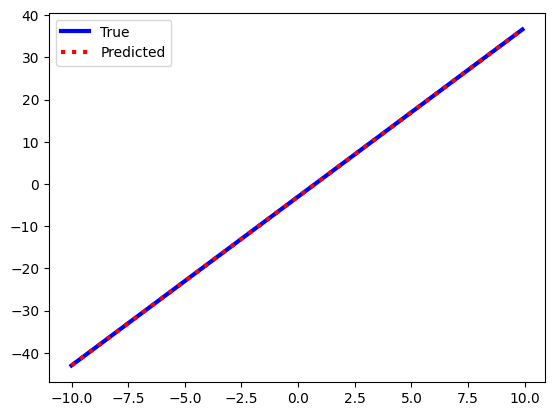

In [23]:
# Graphically check to see if the true and predicted data are similar
plt.plot(X_test,y_test,color='blue',linewidth=3,label="True")
plt.plot(X_test, y_pred, color='red', linewidth=3,linestyle=':', label="Predicted")
plt.legend()

In [24]:
# Check accuracy using traditional error scores (MSE, RMSE, r2-score, percent error, etc.)
print("MEAN SQUARED ERROR:", mean_squared_error(y_test, y_pred))
print("ROOT MEAN SQUARED ERROR:", np.sqrt(mean_squared_error(y_test, y_pred)))

MEAN SQUARED ERROR: 2.4568333336009768e-29
ROOT MEAN SQUARED ERROR: 4.956645371217288e-15


In [25]:
# Check the optimized weights and the slope that are fit by the linear regression algorithm
# The slope should be 4 and the intercept -3 (set when we created the data)
print("LINEAR REGRESSION SLOPE:", linear_regression.coef_)
print("LINEAR REGRESSION INTERCEPT:", linear_regression.intercept_)

LINEAR REGRESSION SLOPE: [4.]
LINEAR REGRESSION INTERCEPT: -2.9999999999999996


## Why start with linear regression?
* Simple machine learning model which has many of the feature of more complicated models
    * A loss function
    * Weights/parameters to be optimized
    * A "training" process
* Closed-form for optimized weights means same results for the same data
* Many data sets follow a linear-ish pattern
* Linear regression can be modified to be more powerful with a design matrix (In-Class Assignment) or with regularization (next week)

## Part 2: The Machine Learning Workflow with Linear Regression

## The Machine Learning Workflow

* General Steps of any machine learning analysis:
    * Import the data set, perform an initial analysis
    * Split the data into a training set and a test set
    * Train the machine learning algorithm with the training set
    * Test the performance of the trained model with the test set using numerical metrics and visual analysis
    * (Optional) Improve the performance of the algorithm by either reformatting the data OR changing the parameters of the machine learning algorithm
* *Hands-On Machine Learning* Chapter 2 has a detailed walkthrough with the "Boston Housing Market" data set
* Helpful Checklist: Appendix B

## 1. Import the data set, perform an initial analysis

* Importing the data set from a file, Python library, or website
* Determine what the data set contains
* Determine if any of the data needs to be modified or removed (missing values, non-numeric values, etc.)
* Perform initial analysis: Print the data, graph the data, modify the data if needed


The data set we will be analyzing is called the "Diabetes Data Set" and it contains data from 442 people. The goal of the data set is to predict a machine learning model that can tell how far diabetes has progressed in the patient given various health information.

In [8]:
# The data set is avaliable through Scikit-Learn
diabetes_data = datasets.load_diabetes()
diabetes_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [9]:
# Features: x-data set
# Data on each of the patients in the study

# How many features and data points?
print(diabetes_data.data.shape)
# What are the features?
print(diabetes_data.feature_names)

(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Diabetes Dataset Feature Explanations

Note that all features data is mean-centered and scaled so the values do not reflect the actual measurements

| Feature Name | Explanation                                       |
|--------------|---------------------------------------------------|
| age          | Age of patient in years                           |
| sex          | Biological sex of patient (male (0) or female (1) |
| bmi          | Body mass index                                   |
| bp           | Blood pressure                                    |
| s1           | Total serum cholestrol                            |
| s2           | Low-density lipoproteins                          |
| s3           | High-density lipoproteins                         |
| s4           | Total cholestrol                                  |
| s5           | Log of serum triclyceride levels                  |
| s6           | Blood sugar                                       |

In [10]:
# Targets: y-data set
# A quantitative measure of how far the disease has progressed
print(diabetes_data.target)
print("------------------------------------")
print(np.min(diabetes_data.target), np.max(diabetes_data.target))

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [11]:
# Load the diabetes dataset in a better format for machine learning
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

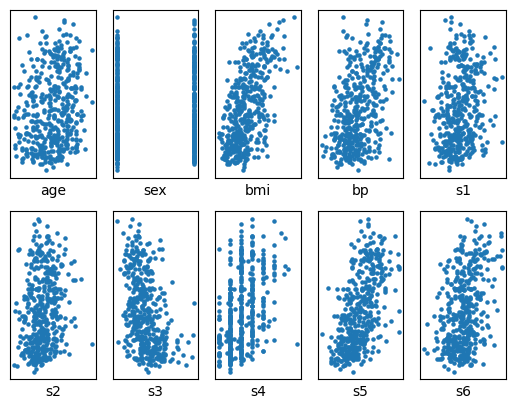

In [12]:
# Plot each of the features against the target values
fig, axs = plt.subplots(2,5)
k = 0
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(diabetes_X[:,k], diabetes_y, s=5)
        axs[i][j].set_xlabel(datasets.load_diabetes().feature_names[k])
        k += 1
        axs[i][j].set_yticks(())
        axs[i][j].set_xticks(())

In [14]:
# Decide which features are useful for predicting the disease progression
# Feature engineering
bp = diabetes_X[:,3]
s5 = diabetes_X[:,8]
diabetes_X = np.array([bp,s5]).T

## Split the data into a training set and a test set

Typically you do not want to train the machine learning model on the entire data set.  Rather, you want to train the model on most of the data but reserve some of the original data set to test the model's performance.

`train_test_split` from Scikit-Learn is a common way to randomly split a data set into a training set and a test set.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2)

## Train the machine learning algorithm with the training set

In [16]:
# Create linear regression object
linear_regression = LinearRegression()

# Train the model using the training sets
linear_regression.fit(X_train, y_train)

LinearRegression()

## Test the performance of the trained model with the test set using numerical metrics and visual analysis

In [17]:
# Make predictions using the testing set
y_pred = linear_regression.predict(X_test)

In [18]:
# The coefficients
print("Coefficients:", linear_regression.coef_, linear_regression.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination (r2 score): 1 is perfect prediction
print("R2-Score: %.2f" % r2_score(y_test, y_pred))
# The mean absolute percent error
print("Mean absolute percent error: %2f" % mean_absolute_percentage_error(y_test, y_pred))

Coefficients: [394.03894133 778.68667298] 154.4842718017968
Mean squared error: 3457.14
Root mean squared error: 58.80
R2-Score: 0.39
Mean absolute percent error: 0.510326


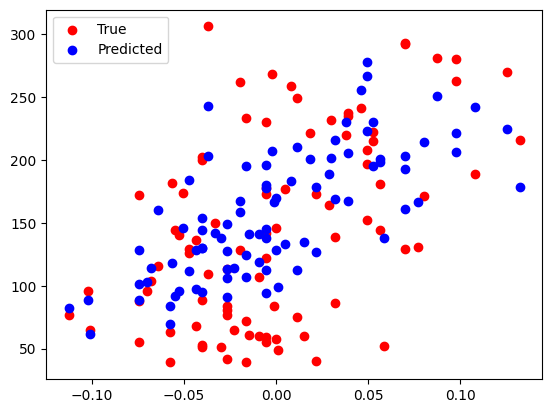

In [19]:
# Plot outputs
plt.scatter(X_test[:,0], y_test, color="red", label="True")
plt.scatter(X_test[:,0], y_pred, color="blue", label="Predicted")
plt.legend()

## (Optional) Improve the performance of the algorithm by either reformatting the data OR changing the parameters of the machine learning algorithm
* Choose different features or a different number of features?
* Choose a different amount of test data (i.e. train the model with more data)?
* Use a different machine learning algorithm?
* Use a design matrix (In-Class Assignment Week 2)?